## Bias embeddings - baseline
Here is code to make plots for the baseline metrics for gender and adjective.

# Occupation embeddings

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import abline_plot

In [20]:
#Load and clean dataframes
eng_embed = pd.read_excel("data/eng_norm.xlsx")
eng_embed['Relative Female Perc'] = eng_embed['Census Female Perc'].apply(lambda x: x-(100-x))
eng_embed = eng_embed.drop(columns=["Tensor Difference", 'Census Female Perc', "Unnamed: 3"])

hin_embed = pd.read_excel("data/hin_norm.xlsx")
hin_embed['Census Female Perc'] *= 100 #make a percentage 
hin_embed['Relative Female Perc'] = hin_embed['Census Female Perc'].apply(lambda x: x-(100-x))
hin_embed = hin_embed.drop(columns=["Tensor Difference", 'Census Female Perc', "Unnamed: 3"])

/Users/Olive/miniconda2/envs/nlu/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


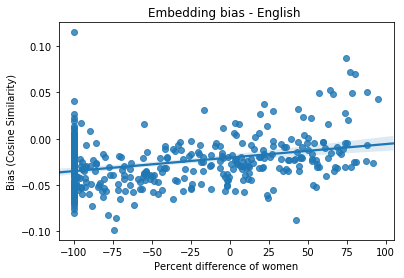

In [40]:
import seaborn as sns

e = sns.regplot(x='Relative Female Perc', y='Cosine Distance', data=eng_embed)
e.set_ylabel('Bias (Cosine Similarity)')
e.set_xlabel('Percent difference of women')
e.set_title("Embedding bias - English ")
plt.savefig('eng_bias.png')

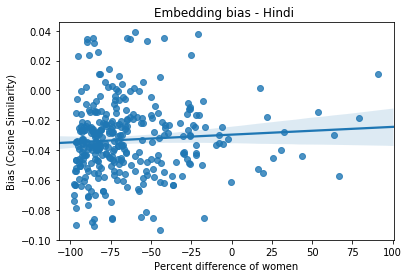

In [41]:
h = sns.regplot(x='Relative Female Perc', y='Cosine Distance', data=hin_embed)
h.set_ylabel('Bias (Cosine Similarity)')
h.set_xlabel('Percent difference of women')
h.set_title("Embedding bias - Hindi ")
plt.savefig('hin_bias.png')

h = sns.regplot(x='Relative Female Perc', y='Cosine Distance', data=hin_embed)
h.set_ylabel('Bias')
h.set_xlabel('Percent difference of women')
h.set_title("Embedding bias - Hindi ")

### Pearson Coefficients:

In [12]:
eng_embed.corr(method='pearson')

,Cosine Distance,Relative Female Perc
Cosine Distance,1.000000,0.334853
Relative Female Perc,0.334853,1.000000


In [13]:
hin_embed.corr(method='pearson')

,Cosine Distance,Relative Female Perc
Cosine Distance,1.00000,0.06704
Relative Female Perc,0.06704,1.00000


# Adjectives

In [14]:
eng_adj = pd.read_excel("data/eng_norm_adj.xlsx")
eng_adj = eng_adj.drop(columns=["Tensor Difference","Unnamed: 2"]);
least = eng_adj.head(5)
most = eng_adj.tail(5)
comb = least.append(most)
comb

,Adjective English,Cosine Distance
0,genius,-0.1092
1,jovial,-0.0935
2,gregarious,-0.0808
3,pugnacious,-0.0713
4,suave,-0.0702
148,delicate,0.0456
149,beautiful,0.0582
150,sensual,0.0612
151,gorgeous,0.0662
152,voluptuous,0.0980


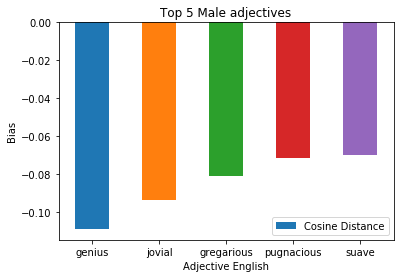

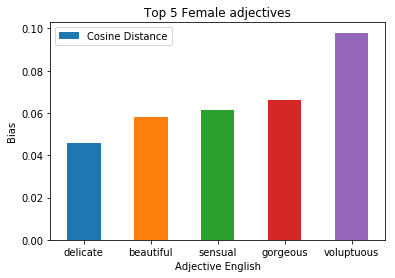

In [15]:
engadjplot = least.plot.bar(x ='Adjective English', y='Cosine Distance', rot=0)
engadjplot.set_ylabel('Bias')
engadjplot.set_title('Top 5 Male adjectives')
plt.savefig('male_adj_eng.png')
engadjplot2 = most.plot.bar(x='Adjective English', y='Cosine Distance', rot=0)
engadjplot2.set_ylabel('Bias')
engadjplot2.set_title('Top 5 Female adjectives')
plt.savefig('female_adj_eng.png')
plt.show()

In [16]:
hin_adj = pd.read_excel("data/hin_norm_adj.xlsx")
hin_adj = hin_adj.drop(columns=["Tensor Difference","Unnamed: 3"])
h_least = hin_adj.head(5)
h_most = hin_adj.tail(5)
h_comb = h_least.append(h_most)
h_comb

,Adjective Hindi,Adjective English,Cosine Distance
0,काम कर रहे,working,-0.3078
4,धूर्त,sly,-0.1571
5,अशिष्ट,rude,-0.1532
6,बेवकूफ,stupid,-0.1390
7,होशियार,smart,-0.1385
142,असामयिक,precocious,0.0483
143,प्रगतिशील,progressive,0.0532
144,कामुक,sensual,0.0628
145,कामुक,voluptuous,0.0628
146,की गणना,calculating,0.1422


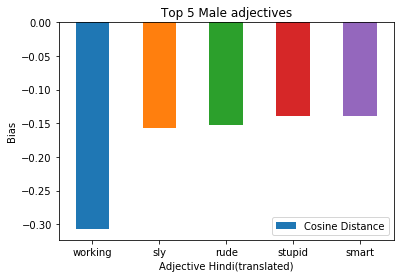

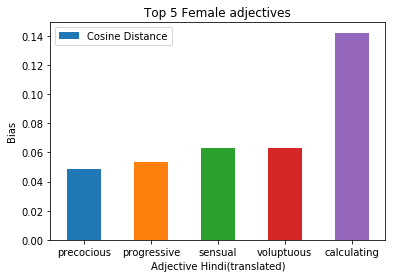

In [17]:
hinadjplot = h_least.plot.bar(x='Adjective English', y='Cosine Distance', rot=0)
hinadjplot.set_ylabel('Bias')
hinadjplot.set_xlabel('Adjective Hindi(translated)')
hinadjplot.set_title('Top 5 Male adjectives')
plt.savefig('male_adj_hin.png')
hinadjplot2 = h_most.plot.bar(x='Adjective English', y='Cosine Distance', rot=0)
hinadjplot2.set_ylabel('Bias')
hinadjplot2.set_xlabel('Adjective Hindi(translated)')
hinadjplot2.set_title('Top 5 Female adjectives')
plt.savefig('female_adj_hin.png')
plt.show()

In [26]:
#Load and clean dataframes
muse_hin_df = pd.read_excel("data/hin_muse_tensor.xlsx")
muse_hin_df['Census Female Perc'] *= 100 #make a percentage 
muse_hin_df['Relative Female Perc'] = muse_hin_df['Census Female Perc'].apply(lambda x: x-(100-x))
muse_hin_df = muse_hin_df.drop(columns=["Tensor Difference", 'Census Female Perc', "Unnamed: 3", 
                                       "Unnamed: 4", "Unnamed: 5"])

In [27]:
muse_hin_df.head()

,Job,Cosine Similarity,Relative Female Perc
0,वेटर और बारटेंडर,-0.1186,-86.527268
1,कंप्यूटर प्रोग्रामर,-0.0910,-56.159493
2,कंप्यूटर एसोसिएट पेशेवर,-0.0852,-47.829129
3,"कंप्यूटर प्रोफेशनल, एनईसी",-0.0811,-65.943334
4,कंप्यूटर सहायक,-0.0802,-43.572310


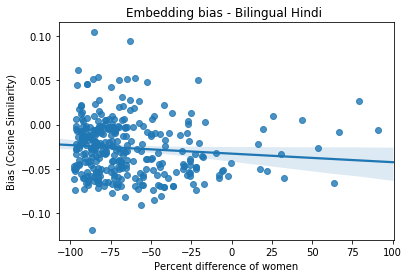

In [28]:
m_plot = sns.regplot(x='Relative Female Perc', y='Cosine Similarity', data=muse_hin_df)
m_plot.set_ylabel('Bias (Cosine Similarity)')
m_plot.set_xlabel('Percent difference of women')
m_plot.set_title("Embedding bias - Bilingual Hindi ")
plt.savefig('muse_hin_bias.png')

In [51]:
muse_hin_df.corr(method='pearson')

,Cosine Similarity,Relative Female Perc
Cosine Similarity,1.000000,-0.095609
Relative Female Perc,-0.095609,1.000000


In [37]:
muse_adj = pd.read_excel("data/hin_tensor_align_adj.xlsx")
muse_adj = muse_adj.drop(columns=["Tensor Difference", "Unnamed: 3"] )
musemale = muse_adj.head(5)
musefemale = muse_adj.tail(5)
tenadj = musemale.append(musefemale)
tenadj

,Adjective Hindi Align,Adjective English,Cosine Similarity
0,काम कर रहे,working,-0.2854
1,डींग मारने का,boastful,-0.1955
2,धूर्त,sly,-0.1501
3,होशियार,smart,-0.1316
4,बेवकूफ,stupid,-0.1296
142,असामयिक,precocious,0.0724
143,प्रगतिशील,progressive,0.0726
144,कामुक,sensual,0.0775
145,कामुक,voluptuous,0.0775
146,की गणना,calculating,0.1844


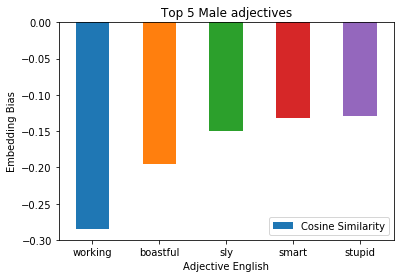

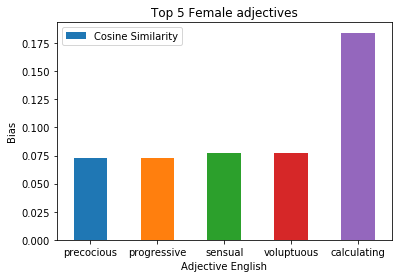

In [39]:
museadjplot = musemale.plot.bar(x ='Adjective English', y='Cosine Similarity', rot=0)
museadjplot.set_ylabel('Embedding Bias')
museadjplot.set_title('Top 5 Male adjectives')
plt.savefig('musemale_adj.png')
museadjplot2 = musefemale.plot.bar(x='Adjective English', y='Cosine Similarity', rot=0)
museadjplot2.set_ylabel('Bias')
museadjplot2.set_title('Top 5 Female adjectives')
plt.savefig('musefemale_adj.png')
plt.show()

In [50]:
#Find correlation between Hindi monolingual and bilingual biases
hindi = pd.DataFrame(columns=['Monolingual', 'Bilingual'])
hindi['Monolingual'] = hin_embed['Cosine Distance']
hindi['Bilingual'] = muse_hin_df['Cosine Similarity']
hindi.corr(method='pearson')

,Monolingual,Bilingual
Monolingual,1.00000,0.98453
Bilingual,0.98453,1.00000


In [66]:
from googletrans import Translator 

In [92]:
#hin_muse_similar.xlsx - compiles the similar occupations using monolingual embeddings
#doctor, mech e, lawyer and cook
mon_sim_occ = pd.read_excel("data/hin_muse_similar.xlsx")
mon_doctor = mon_sim_occ.loc[0:48]
mon_mech = mon_sim_occ.loc[49:98]
mon_lawyer = mon_sim_occ.loc[100:149]
mon_cook = mon_sim_occ.loc[150:199]

In [110]:
# Sort the rows of dataframe by column 'Tensor Similarity'
mon_lawyer = mon_lawyer.sort_values(by ='Tensor Similarity')
mon_lawyer.head()
mon_lawyer.iloc[0:6]
# Advocates
# Doctor
# Hegde
# Justice
# Nadkarni
#engineer

,Occupation Name,Tensor Similarity
149,अधिवक्ताओं,0.340894
148,चिकित्सक,0.341302
147,हेगडे,0.341879
146,न्यायमूर्ति,0.343350
145,नाडकर्णी,0.344142
144,इंजिनियर,0.344273


In [90]:
mon_doctor = mon_doctor.sort_values(by ='Tensor Similarity')
mon_doctor.head()
# Semester
# Vector
# Daughter 
# minutes 
# psychiatrists

,Occupation Name,Tensor Similarity
48,सेमिस्टर,0.339141
47,वेक्टर,0.339464
46,डॉटर,0.341755
45,मिनिस्टर,0.341871
44,मनोचिकित्सक,0.344094


In [102]:
mon_mech = mon_mech.sort_values(by ='Tensor Similarity')
mon_mech.head()
mon_mech.iloc[1:9]
# Junior
# Electrical
# Engineers
# Neural
# झामयंत्र (can't translate this??)

,Occupation Name,Tensor Similarity
98,जुनियर,0.380782
97,इलेक्ट्रिकल,0.384741
96,इंजिनियरों,0.386941
95,तंत्रिकीय,0.388412
94,झामयंत्र,0.390174
93,अभियान्त्रिकी,0.390991
92,मिकैनिकल,0.391159
91,इंजिनयरिंग,0.392657


In [98]:
mon_cook = mon_cook.sort_values(by ='Tensor Similarity')
mon_cook.head()
mon_cook.iloc[1:6] 
# cucumber 
# maid
# serving
# missed
# roti

,Occupation Name,Tensor Similarity
199,ककड़ी,0.330922
198,मैदे,0.331503
197,परोसना,0.331894
196,छोले,0.332478
195,रोटी,0.332975


In [103]:
#hin_tensor_similar.xlsx - compiles the similar occupations using bilingual embeddings
#doctor, mech e, lawyer and cook
bi_sim_occ = pd.read_excel("data/hin_tensor_similar.xlsx")
bi_doctor = bi_sim_occ.loc[0:48]
bi_mech = bi_sim_occ.loc[49:98]
bi_lawyer = bi_sim_occ.loc[100:149]
bi_cook = bi_sim_occ.loc[150:199]

In [104]:
# Sort the rows of dataframe by column 'Tensor Similarity'
bi_lawyer = bi_lawyer.sort_values(by ='Tensor Similarity')
bi_lawyer.head()
#Politician
# गुरुमूर्ति Gurumurthy
# Accused
# In the lawsuit
# Judicial

,Occupation Name,Tensor Similarity
149,राजनेत्री,0.485249
148,गुरुमूर्ति,0.485582
147,अभियुक्त,0.485829
146,मुकदमें,0.487115
145,न्यायकारी,0.487651


In [105]:
bi_doctor = bi_doctor.sort_values(by ='Tensor Similarity')
bi_doctor.head()
# Nursing 
# psychiatrists 
# Anesthetists
# Bachelor
# Actor

,Occupation Name,Tensor Similarity
48,नर्सिग,0.463646
47,मनोचिकित्सकों,0.463848
46,एनेस्थेटिस्ट्स,0.463963
45,बैचलर,0.464777
44,एक्टर,0.465435


In [107]:
bi_mech = bi_mech.sort_values(by ='Tensor Similarity')
bi_mech.head()
bi_mech.iloc[1:6]
#Jam yahoo 
#Fisheries 
#Instrumentation 
# Engineering 
# dielectric

,Occupation Name,Tensor Similarity
98,झामयंत्र,0.521380
97,तुषारजनिकी,0.521589
96,यंत्रीकरण,0.521888
95,अभियान्त्रिकी,0.522027
94,डाइएलेक्ट्रिक,0.522201


In [109]:
bi_cook = bi_cook.sort_values(by ='Tensor Similarity')
bi_cook.head()
bi_cook.iloc[1:6] 
#Food
# Goanyi
# Missing
# Crisp
# Pappu

,Occupation Name,Tensor Similarity
199,खाना,0.516342
198,गोआनी,0.516425
197,मिष्टान्न,0.516486
196,खस्ता,0.516900
195,पप्पू,0.517471
